In [289]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
print("Notebook is ready!")


Notebook is ready!


In [290]:
import pandas as pd
df = pd.read_csv('diabetes_prediction_dataset.csv')



In [291]:
df.head()



,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [292]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [293]:
df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [294]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [13]:
df = df[df['age'] >= 1]

In [14]:
df['bmi'] = df['bmi'].clip(lower=12, upper=60)

In [15]:
df['HbA1c_level'] = df['HbA1c_level'].clip(lower=3.5, upper=9)

In [16]:
df['blood_glucose_level'] = df['blood_glucose_level'].clip(lower=50, upper=300)

In [17]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

In [18]:
df['smoking_history'] = df['smoking_history'].map({'never': 0, 'former': 1, 'current': 2, 'No Info': 3}).fillna(3)

In [19]:
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,0.026820,-0.015184,-0.078753,-0.075707,0.020912,-0.020909,-0.017609,-0.038587
age,0.026820,1.000000,0.250373,0.233629,-0.156381,0.323080,0.100604,0.110644,0.256986
hypertension,-0.015184,0.250373,1.000000,0.120800,-0.086018,0.146451,0.080873,0.084408,0.197184
heart_disease,-0.078753,0.233629,0.120800,1.000000,-0.008294,0.059577,0.067573,0.070074,0.171265
smoking_history,-0.075707,-0.156381,-0.086018,-0.008294,1.000000,-0.141172,-0.027359,-0.032453,-0.072689
bmi,0.020912,0.323080,0.146451,0.059577,-0.141172,1.000000,0.082133,0.091160,0.213390
HbA1c_level,-0.020909,0.100604,0.080873,0.067573,-0.027359,0.082133,1.000000,0.168080,0.401995
blood_glucose_level,-0.017609,0.110644,0.084408,0.070074,-0.032453,0.091160,0.168080,1.000000,0.420756
diabetes,-0.038587,0.256986,0.197184,0.171265,-0.072689,0.213390,0.401995,0.420756,1.000000


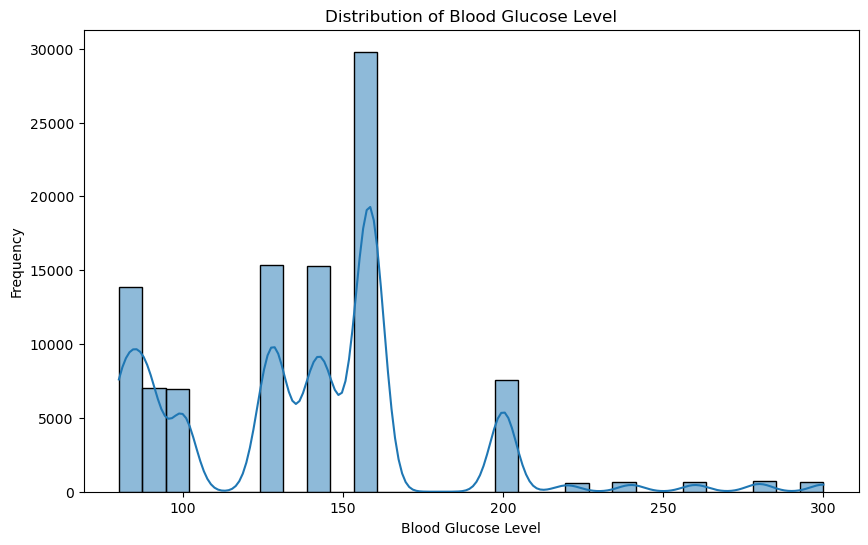

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['blood_glucose_level'], bins=30, kde=True)
plt.title('Distribution of Blood Glucose Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')
plt.show()

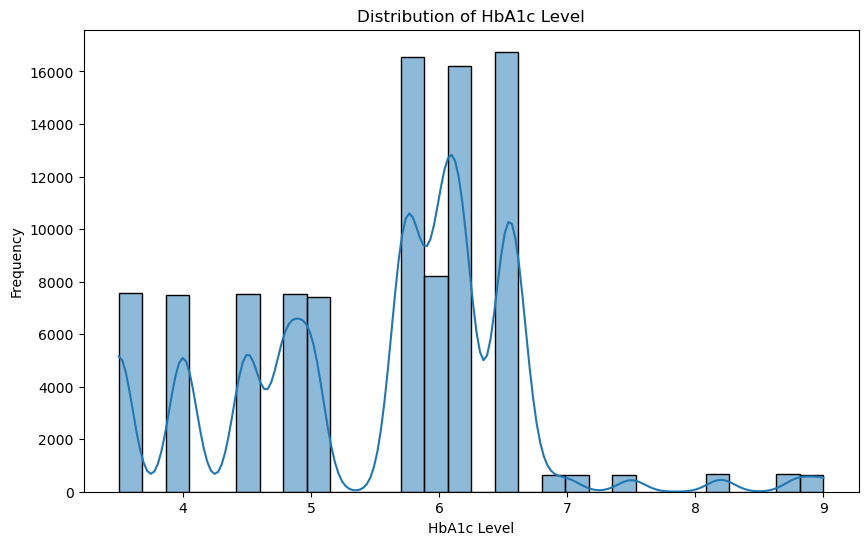

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['HbA1c_level'], bins=30, kde=True)
plt.title('Distribution of HbA1c Level')
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')
plt.show()

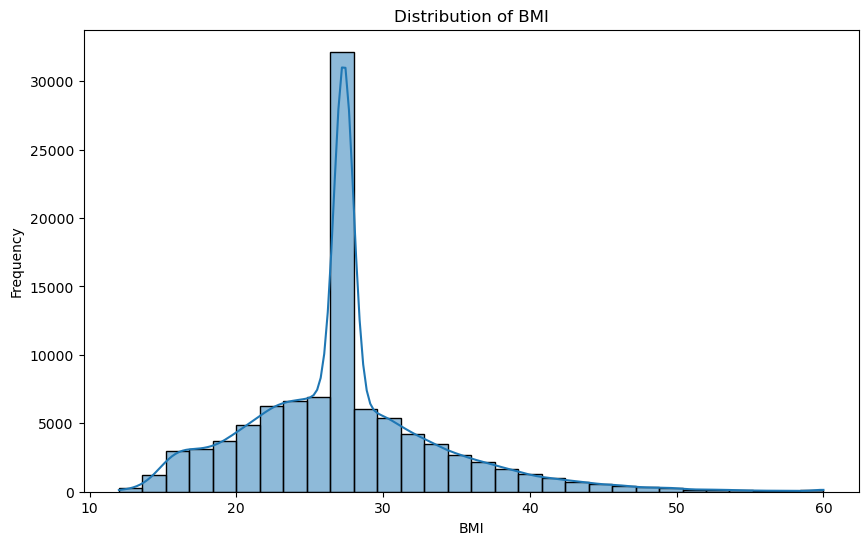

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

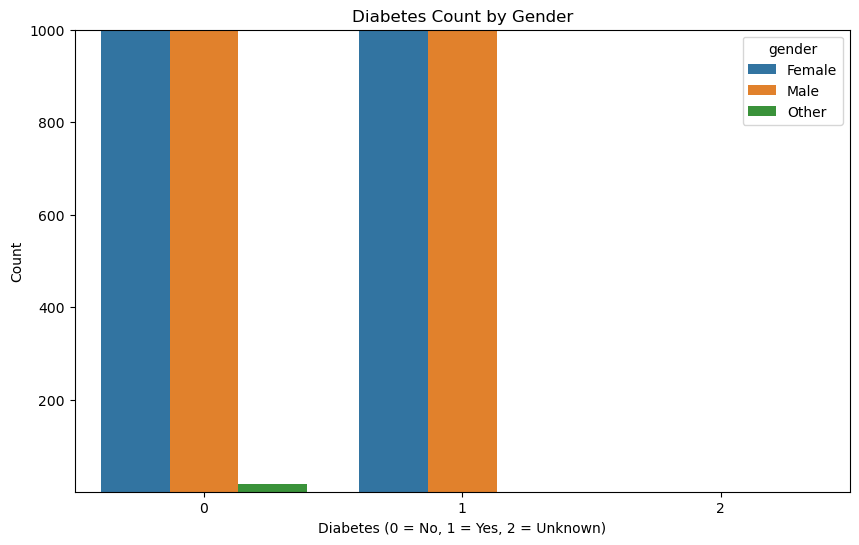

In [23]:
import pandas as pd
df = pd.read_csv('diabetes_prediction_dataset.csv')
plt.figure(figsize=(10, 6))
sns.countplot(x='diabetes', hue='gender', data=df, order=[0, 1, 2])
plt.title('Diabetes Count by Gender')
plt.xlabel('Diabetes (0 = No, 1 = Yes, 2 = Unknown)')
plt.ylabel('Count')
plt.ylim(1,1000) 
plt.show()

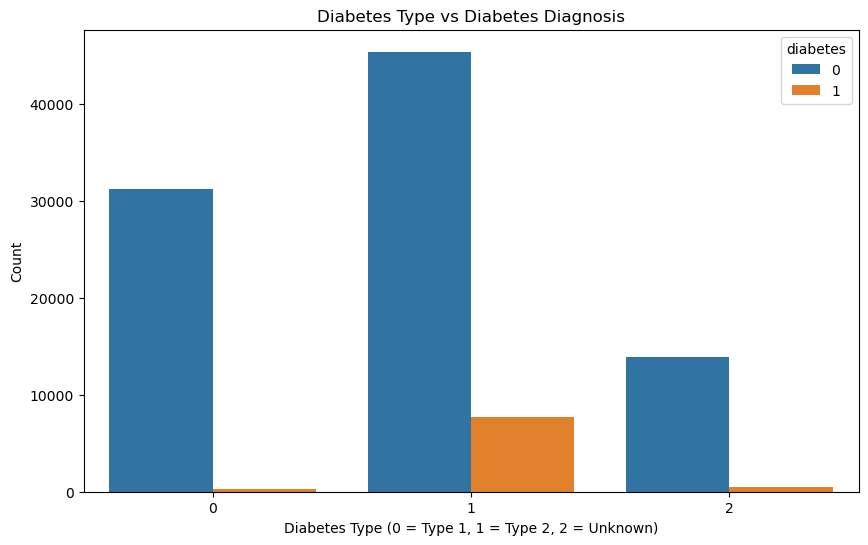

In [306]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes_Type', hue='diabetes', data=data)
plt.title('Diabetes Type vs Diabetes Diagnosis')
plt.xlabel('Diabetes Type (0 = Type 1, 1 = Type 2, 2 = Unknown)')
plt.ylabel('Count')
plt.show()

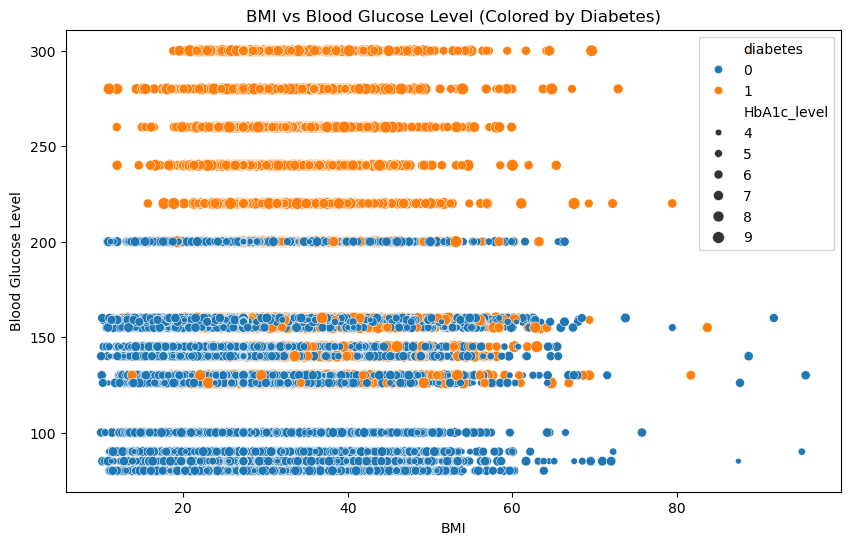

In [24]:
import pandas as pd
df = pd.read_csv('diabetes_prediction_dataset.csv')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='blood_glucose_level', hue='diabetes', size='HbA1c_level', data=df)
plt.title('BMI vs Blood Glucose Level (Colored by Diabetes)')
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.show()

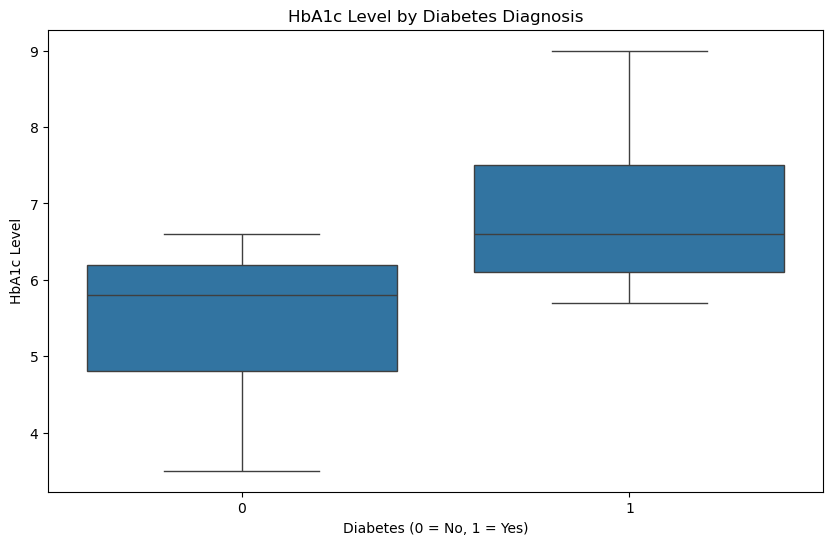

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c Level by Diabetes Diagnosis')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('HbA1c Level')
plt.show()

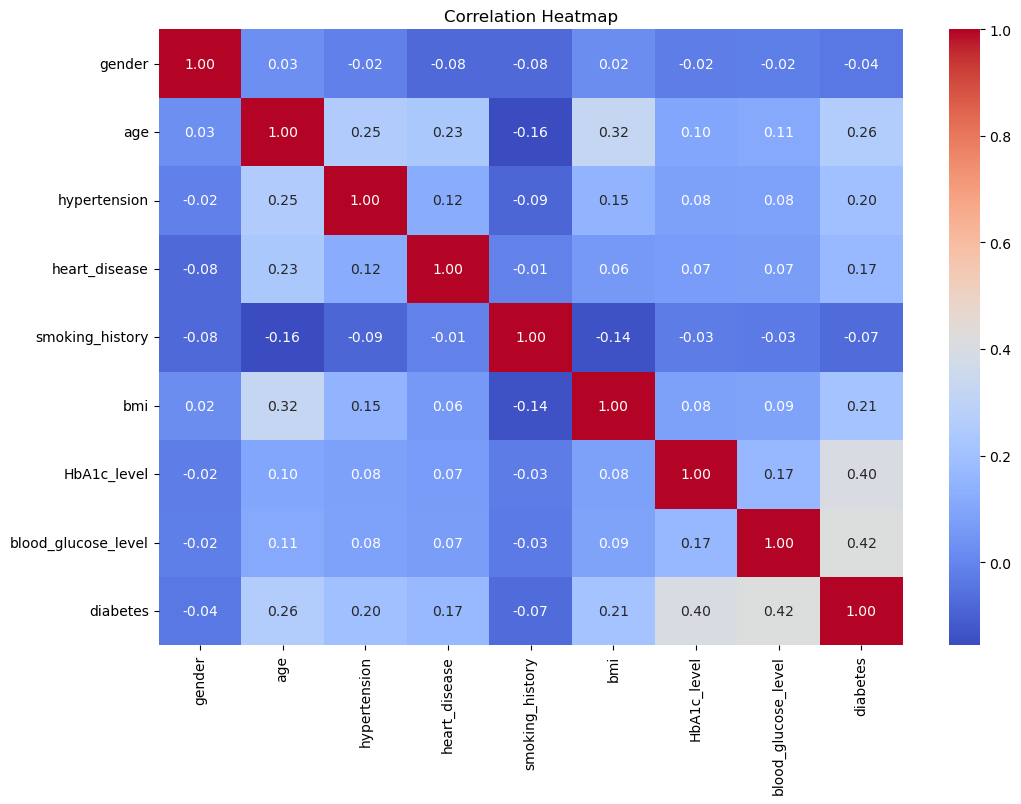

In [309]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
features = df.drop('diabetes', axis=1)
target = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(f"Training data (features) shape: {X_train.shape}")
print(f"Testing data (features) shape: {X_test.shape}")
print(f"Training data (target) shape: {y_train.shape}")
print(f"Testing data (target) shape: {y_test.shape}")

Training data (features) shape: (80000, 8)
Testing data (features) shape: (20000, 8)
Training data (target) shape: (80000,)
Testing data (target) shape: (20000,)


In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in X_train.select_dtypes(include=['object']).columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)
print(X_train.head())
print(X_test.head())

       gender   age  hypertension  heart_disease  smoking_history    bmi  \
75220       1  73.0             0              0                3  24.77   
48955       1  80.0             0              0                4  24.60   
44966       0  38.0             0              0                2  24.33   
13568       0  26.0             0              0                5  18.87   
92727       0  61.0             1              0                1  22.11   

       HbA1c_level  blood_glucose_level  
75220          3.5                   80  
48955          5.7                  145  
44966          4.0                  158  
13568          5.0                  100  
92727          4.5                   85  
       gender   age  hypertension  heart_disease  smoking_history    bmi  \
75721       0  13.0             0              0                0  20.82   
80184       0   3.0             0              0                0  21.00   
19864       1  63.0             0              0               

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
mode_RandomForest = RandomForestClassifier(n_estimators=100, random_state=42)
mode_RandomForest.fit(X_train, y_train)
x_pred_train = mode_RandomForest.predict(X_train)
x_pred = mode_RandomForest.predict(X_test)

traaining_accuracy = accuracy_score(y_train, x_pred_train)
testing_accuracy = accuracy_score(y_test, x_pred)
print(f"Training Accuracy: {traaining_accuracy*100:.2f}")
print(f"Testing Accuracy: {testing_accuracy*100:.2f}")

Training Accuracy: 99.93
Testing Accuracy: 97.06


In [313]:
import joblib
# Save the Random Forest model
joblib.dump(mode_RandomForest, 'model_RandomForest.pkl')
print("Model saved successfully!")

Model saved successfully!


In [314]:
import joblib
# Save the scaler
joblib.dump(scaler,'scaler.pkl')
print("Preprocessing (Scaler) saved successfully!")

Preprocessing (Scaler) saved successfully!
